### Problem statement

#### Practical development of Full-stack customer segmentation in Financial market.

A financial institution plans to facilitate a stock market trading service for its customers. To make the service offering profitable, they charge a percentage-based commission on every trade Transaction. The service will be offered to all customers, and to attract heavy traders company wants to offer discounts selectively. Hence the company needs to know which of their customers will be heavy traders or moneymakers.

The problem is identifying the customer's discount eligibility by classifying them as either the moneymakers for the bank or not. The data provided is a beta run of their service to a small chunk of their customer base (approx. 10000 people), and these customers are manually divided into two revenue categories. We need to use this study's data to build a Full-stack service to identify if a customer is potentially eligible for discounts.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset

In [2]:
tr_data = pd.read_csv("../dataset/rg_train.csv")
ts_data = pd.read_csv("../dataset/rg_test.csv")

In [3]:
tr_data.head()

REF_NO children age_band   status     occupation occupation_partner  \
0    2148        1    45-50  Partner   Professional       Professional   
1    8099        1    61-65  Partner        Retired            Retired   
2    6611        3    31-35  Partner   Professional       Professional   
3    1950     Zero    55-60  Partner   Professional       Professional   
4   10857        2    51-55  Partner  Manual Worker      Manual Worker   

      home_status      family_income self_employed self_employed_partner  ...  \
0  Rent Privately           >=35,000           Yes                   Yes  ...   
1        Own Home  <12,500, >=10,000            No                    No  ...   
2        Own Home           >=35,000            No                    No  ...   
3        Own Home           >=35,000            No                    No  ...   
4        Own Home  <27,500, >=25,000           Yes                   Yes  ...   

   Investment.Tax.Saving.Bond Home.Loan Online.Purchase.Amount Revenue.Grid  \
0                        7.49      2.48                    0.0            2   
1                        0.00      3.99                    0.0            2   
2                        0.00      0.00                    0.0            2   
3                        2.00      0.00                    0.0            2   
4                        0.00      0.00                    0.0            2   

   gender       region  Investment.in.Commudity  Investment.in.Equity  \
0  Female   South West                    65.87                  9.27   
1  Female      Unknown                    42.46                  4.49   
2    Male  East Anglia                    75.38                  0.00   
3  Female   North West                    34.78                  6.91   
4  Female   South West                    48.58                  9.58   

   Investment.in.Derivative  Portfolio.Balance  
0                     30.93              87.48  
1                     26.23             110.73  
2                     26.66             127.57  
3                     29.24              33.79  
4                     20.65              56.17  

[5 rows x 32 columns]

In [4]:
tr_data.tail()

REF_NO children age_band   status         occupation occupation_partner  \
8119   10391     Zero      71+  Widowed            Retired            Unknown   
8120    3955     Zero    61-65  Partner            Retired            Retired   
8121    1195     Zero    61-65  Partner            Retired            Retired   
8122    6581        2    26-30  Partner  Secretarial/Admin      Manual Worker   
8123    2099        1    51-55  Partner  Secretarial/Admin      Manual Worker   

               home_status      family_income self_employed  \
8119              Own Home  <10,000, >= 8,000            No   
8120              Own Home  <15,000, >=12,500            No   
8121              Own Home  <25,000, >=22,500            No   
8122              Own Home  <30,000, >=27,500            No   
8123  Rent from Council/HA  <17,500, >=15,000            No   

     self_employed_partner  ...  Investment.Tax.Saving.Bond Home.Loan  \
8119                    No  ...                         0.0      0.00   
8120                    No  ...                         0.0      0.00   
8121                    No  ...                         8.0      0.00   
8122                    No  ...                         0.0      0.00   
8123                    No  ...                         0.0      2.99   

     Online.Purchase.Amount Revenue.Grid  gender         region  \
8119                    0.0            2  Female  West Midlands   
8120                    0.0            2    Male     North West   
8121                    0.0            2  Female  West Midlands   
8122                    0.0            2  Female       Scotland   
8123                    0.0            2  Female     South East   

      Investment.in.Commudity  Investment.in.Equity  Investment.in.Derivative  \
8119                    32.19                  1.67                     20.66   
8120                    24.09                  0.00                      4.17   
8121                    42.98                  3.49                     16.48   
8122                    25.38                  0.00                     11.99   
8123                     1.60                 26.73                     26.23   

      Portfolio.Balance  
8119              66.26  
8120              -2.70  
8121              36.72  
8122             -11.65  
8123              46.04  

[5 rows x 32 columns]

In [5]:
ts_data.head()

REF_NO children age_band   status         occupation occupation_partner  \
0       9        1    36-40  Partner       Professional       Professional   
1      13     Zero    61-65  Partner            Retired            Retired   
2      18     Zero    26-30  Partner            Unknown       Professional   
3      21        1    41-45  Partner  Secretarial/Admin      Manual Worker   
4      26     Zero    26-30  Partner       Professional       Professional   

  home_status      family_income self_employed self_employed_partner  ...  \
0    Own Home           >=35,000            No                    No  ...   
1    Own Home  <12,500, >=10,000            No                    No  ...   
2    Own Home           >=35,000           Yes                    No  ...   
3    Own Home  <12,500, >=10,000            No                    No  ...   
4    Own Home           >=35,000            No                    No  ...   

   Investment.in.Mutual.Fund Investment.Tax.Saving.Bond Home.Loan  \
0                      74.93                      41.71     35.41   
1                       0.00                       0.00      5.99   
2                     123.39                       0.00     39.96   
3                      86.43                      12.49     21.46   
4                      25.48                       0.00      0.00   

  Online.Purchase.Amount  gender         region  Investment.in.Commudity  \
0                  11.99  Female       Scotland                    48.67   
1                   0.00  Female          Wales                     5.00   
2                   0.00  Female       Scotland                    63.87   
3                   0.00  Female  West Midlands                    39.48   
4                   0.00  Female  East Midlands                    15.20   

   Investment.in.Equity  Investment.in.Derivative  Portfolio.Balance  
0                 60.23                     63.58             162.40  
1                  1.00                      0.00             -18.84  
2                 36.64                     59.96             115.89  
3                 38.63                     62.04             134.44  
4                  5.08                     17.74              27.95  

[5 rows x 31 columns]

In [6]:
tr_data.shape # number of samples/rows and number of columns/inputs in train set

(8124, 32)

In [7]:
tr_data.columns # list of columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average.Credit.Card.Transaction', 'Balance.Transfer',
       'Term.Deposit', 'Life.Insurance', 'Medical.Insurance',
       'Average.A.C.Balance', 'Personal.Loan', 'Investment.in.Mutual.Fund',
       'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount',
       'Revenue.Grid', 'gender', 'region', 'Investment.in.Commudity',
       'Investment.in.Equity', 'Investment.in.Derivative',
       'Portfolio.Balance'],
      dtype='object')

In [8]:
ts_data.shape # number of samples/rows and number of columns/inputs in test set

(2031, 31)

In [9]:
ts_data.columns # list of columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average.Credit.Card.Transaction', 'Balance.Transfer',
       'Term.Deposit', 'Life.Insurance', 'Medical.Insurance',
       'Average.A.C.Balance', 'Personal.Loan', 'Investment.in.Mutual.Fund',
       'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount',
       'gender', 'region', 'Investment.in.Commudity', 'Investment.in.Equity',
       'Investment.in.Derivative', 'Portfolio.Balance'],
      dtype='object')

In [10]:
# 32 cols tr and 31 col in ts there no 
# 

In [11]:
# adding extra column in train and test set as identifier
# adding Target column in test with NaNs
tr_data["data"] = "train"
ts_data["Revenue.Grid"] = np.nan
ts_data["data"] = "test"
ts_data = ts_data[tr_data.columns]

In [12]:
# concatenating train and test set rowwise
all_data = pd.concat([tr_data, ts_data], axis=0, ignore_index=True)
all_data.shape

(10155, 33)

In [13]:
# checking missing values (null/nan) in each column
all_data.isnull().sum()

REF_NO                                0
children                              0
age_band                              0
status                                0
occupation                            0
occupation_partner                    0
home_status                           0
family_income                         0
self_employed                         0
self_employed_partner                 0
year_last_moved                       0
TVarea                                0
post_code                             0
post_area                             0
Average.Credit.Card.Transaction       0
Balance.Transfer                      0
Term.Deposit                          0
Life.Insurance                        0
Medical.Insurance                     0
Average.A.C.Balance                   0
Personal.Loan                         0
Investment.in.Mutual.Fund             0
Investment.Tax.Saving.Bond            0
Home.Loan                             0
Online.Purchase.Amount                0


In [14]:
# Checking Datatypes and Unique Values
list(zip(all_data.columns, all_data.dtypes, all_data.nunique()))

[('REF_NO', dtype('int64'), 10155),
 ('children', dtype('O'), 5),
 ('age_band', dtype('O'), 13),
 ('status', dtype('O'), 5),
 ('occupation', dtype('O'), 9),
 ('occupation_partner', dtype('O'), 9),
 ('home_status', dtype('O'), 5),
 ('family_income', dtype('O'), 13),
 ('self_employed', dtype('O'), 2),
 ('self_employed_partner', dtype('O'), 2),
 ('year_last_moved', dtype('int64'), 95),
 ('TVarea', dtype('O'), 14),
 ('post_code', dtype('O'), 10040),
 ('post_area', dtype('O'), 2039),
 ('Average.Credit.Card.Transaction', dtype('float64'), 1411),
 ('Balance.Transfer', dtype('float64'), 2183),
 ('Term.Deposit', dtype('float64'), 1419),
 ('Life.Insurance', dtype('float64'), 3111),
 ('Medical.Insurance', dtype('float64'), 1589),
 ('Average.A.C.Balance', dtype('float64'), 2223),
 ('Personal.Loan', dtype('float64'), 1760),
 ('Investment.in.Mutual.Fund', dtype('float64'), 2470),
 ('Investment.Tax.Saving.Bond', dtype('float64'), 832),
 ('Home.Loan', dtype('float64'), 884),
 ('Online.Purchase.Amount'

In [15]:
all_data.describe()

REF_NO  year_last_moved  Average.Credit.Card.Transaction  \
count  10155.000000     10155.000000                     10155.000000   
mean    5770.830822      1968.376366                        23.441757   
std     3324.837813       180.202242                        50.872127   
min        1.000000         0.000000                         0.000000   
25%     2903.500000      1978.000000                         0.000000   
50%     5770.000000      1988.000000                         0.000000   
75%     8665.500000      1994.000000                        23.980000   
max    11518.000000      1999.000000                       662.260000   

       Balance.Transfer  Term.Deposit  Life.Insurance  Medical.Insurance  \
count      10155.000000  10155.000000    10155.000000       10155.000000   
mean          46.417760     27.579851       66.242131          19.142050   
std           78.477609     53.952550       95.545316          32.451856   
min            0.000000      0.000000        0.000000           0.000000   
25%            0.000000      0.000000        0.000000           0.000000   
50%           17.960000      0.000000       31.980000           0.510000   
75%           65.385000     34.990000       94.390000          27.470000   
max         2951.760000    784.820000     2930.410000         591.040000   

       Average.A.C.Balance  Personal.Loan  Investment.in.Mutual.Fund  \
count         10155.000000   10155.000000               10155.000000   
mean             32.084965      26.006003                  42.339698   
std              45.486614      84.275743                  63.898899   
min               0.000000       0.000000                   0.000000   
25%               0.000000       0.000000                   0.000000   
50%              14.990000       0.000000                  23.480000   
75%              46.480000      21.480000                  59.555000   
max             626.240000    4905.930000                2561.270000   

       Investment.Tax.Saving.Bond     Home.Loan  Online.Purchase.Amount  \
count                10155.000000  10155.000000            10155.000000   
mean                     6.112071      4.482002               19.162772   
std                     12.833675      9.982641               89.666263   
min                      0.000000      0.000000                0.000000   
25%                      0.000000      0.000000                0.000000   
50%                      0.000000      0.000000                0.000000   
75%                      5.975000      4.490000                7.980000   
max                    156.870000    162.350000             4306.420000   

       Revenue.Grid  Investment.in.Commudity  Investment.in.Equity  \
count   8124.000000             10155.000000          10155.000000   
mean       1.893772                36.564886             21.698694   
std        0.308149                42.270530             31.893841   
min        1.000000                 0.000000              0.000000   
25%        2.000000                 8.230000              4.670000   
50%        2.000000                23.980000             12.980000   
75%        2.000000                50.790000             28.300000   
max        2.000000              1231.090000           1279.100000   

       Investment.in.Derivative  Portfolio.Balance  
count              10155.000000       10155.000000  
mean                  31.988647          90.460237  
std                   39.106347         107.265475  
min                    0.000000         -78.430000  
25%                    8.740000          26.605000  
50%                   21.340000          66.200000  
75%                   42.980000         125.935000  
max                 1771.160000        4283.560000

In [16]:
# ref no, post code, post area : drop
# children : zero:0, 4+: 4 : then convert to numeric
# age band : dummies
# status, occupation, occupation partner, home status, family income :  dummies
# self employed : dummies
# TVarea, region, gender : dummies
# Revenue grid : 1, 2 : 1, 0

In [17]:
# Target Variable
print(all_data["Revenue.Grid"].value_counts())
print(all_data["Revenue.Grid"].value_counts(normalize=True))

Revenue.Grid
2.0    7261
1.0     863
Name: count, dtype: int64
Revenue.Grid
2.0    0.893772
1.0    0.106228
Name: proportion, dtype: float64


In [18]:
all_data_copy = all_data.copy()

### Categorical Variables

Children

In [19]:
all_data.children.value_counts()

children
Zero    6208
1       1848
2       1607
3        473
4+        19
Name: count, dtype: int64

In [20]:
all_data["children"] = np.where(all_data["children"] == "Zero", 0, all_data["children"])
all_data["children"] = np.where(all_data["children"] == "4+", 4, all_data["children"])
# all_data["children"] = pd.to_numeric(all_data["children"], errors="coerce")
all_data["children"]  = all_data["children"].astype(str)

Age Band

In [21]:
all_data["age_band"].value_counts()

age_band
45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: count, dtype: int64

Status : Marriage status

In [22]:
all_data["status"].value_counts()

status
Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: count, dtype: int64

Occupation

In [23]:
all_data["occupation"].value_counts()

occupation
Professional         2449
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: count, dtype: int64

In [24]:
all_data["occupation_partner"].value_counts()

occupation_partner
Unknown              2394
Professional         2051
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: count, dtype: int64

In [25]:
all_data["home_status"].value_counts()

home_status
Own Home                9413
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: count, dtype: int64

Family Income

In [26]:
all_data["family_income"].value_counts()

family_income
>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: count, dtype: int64

Self Employed

In [27]:
all_data["self_employed"].value_counts()

self_employed
No     9436
Yes     719
Name: count, dtype: int64

In [28]:
all_data["self_employed_partner"].value_counts()

self_employed_partner
No     9026
Yes    1129
Name: count, dtype: int64

TVarea

In [29]:
all_data["TVarea"].value_counts()

TVarea
Central          1618
Carlton          1541
Meridian         1226
Yorkshire        1042
Granada          1039
HTV               845
Anglia            751
Tyne Tees         536
Scottish TV       520
TV South West     363
Grampian          227
Unknown           189
Ulster            159
Border             99
Name: count, dtype: int64

Gender

In [30]:
all_data["gender"].value_counts()

gender
Female     7634
Male       2486
Unknown      35
Name: count, dtype: int64

Region

In [31]:
all_data["region"].value_counts()

region
South East          2100
North West          1896
Unknown             1080
South West           971
West Midlands        820
Scotland             787
East Midlands        771
North                571
Wales                556
East Anglia          423
Northern Ireland     159
Isle of Man           16
Channel Islands        5
Name: count, dtype: int64

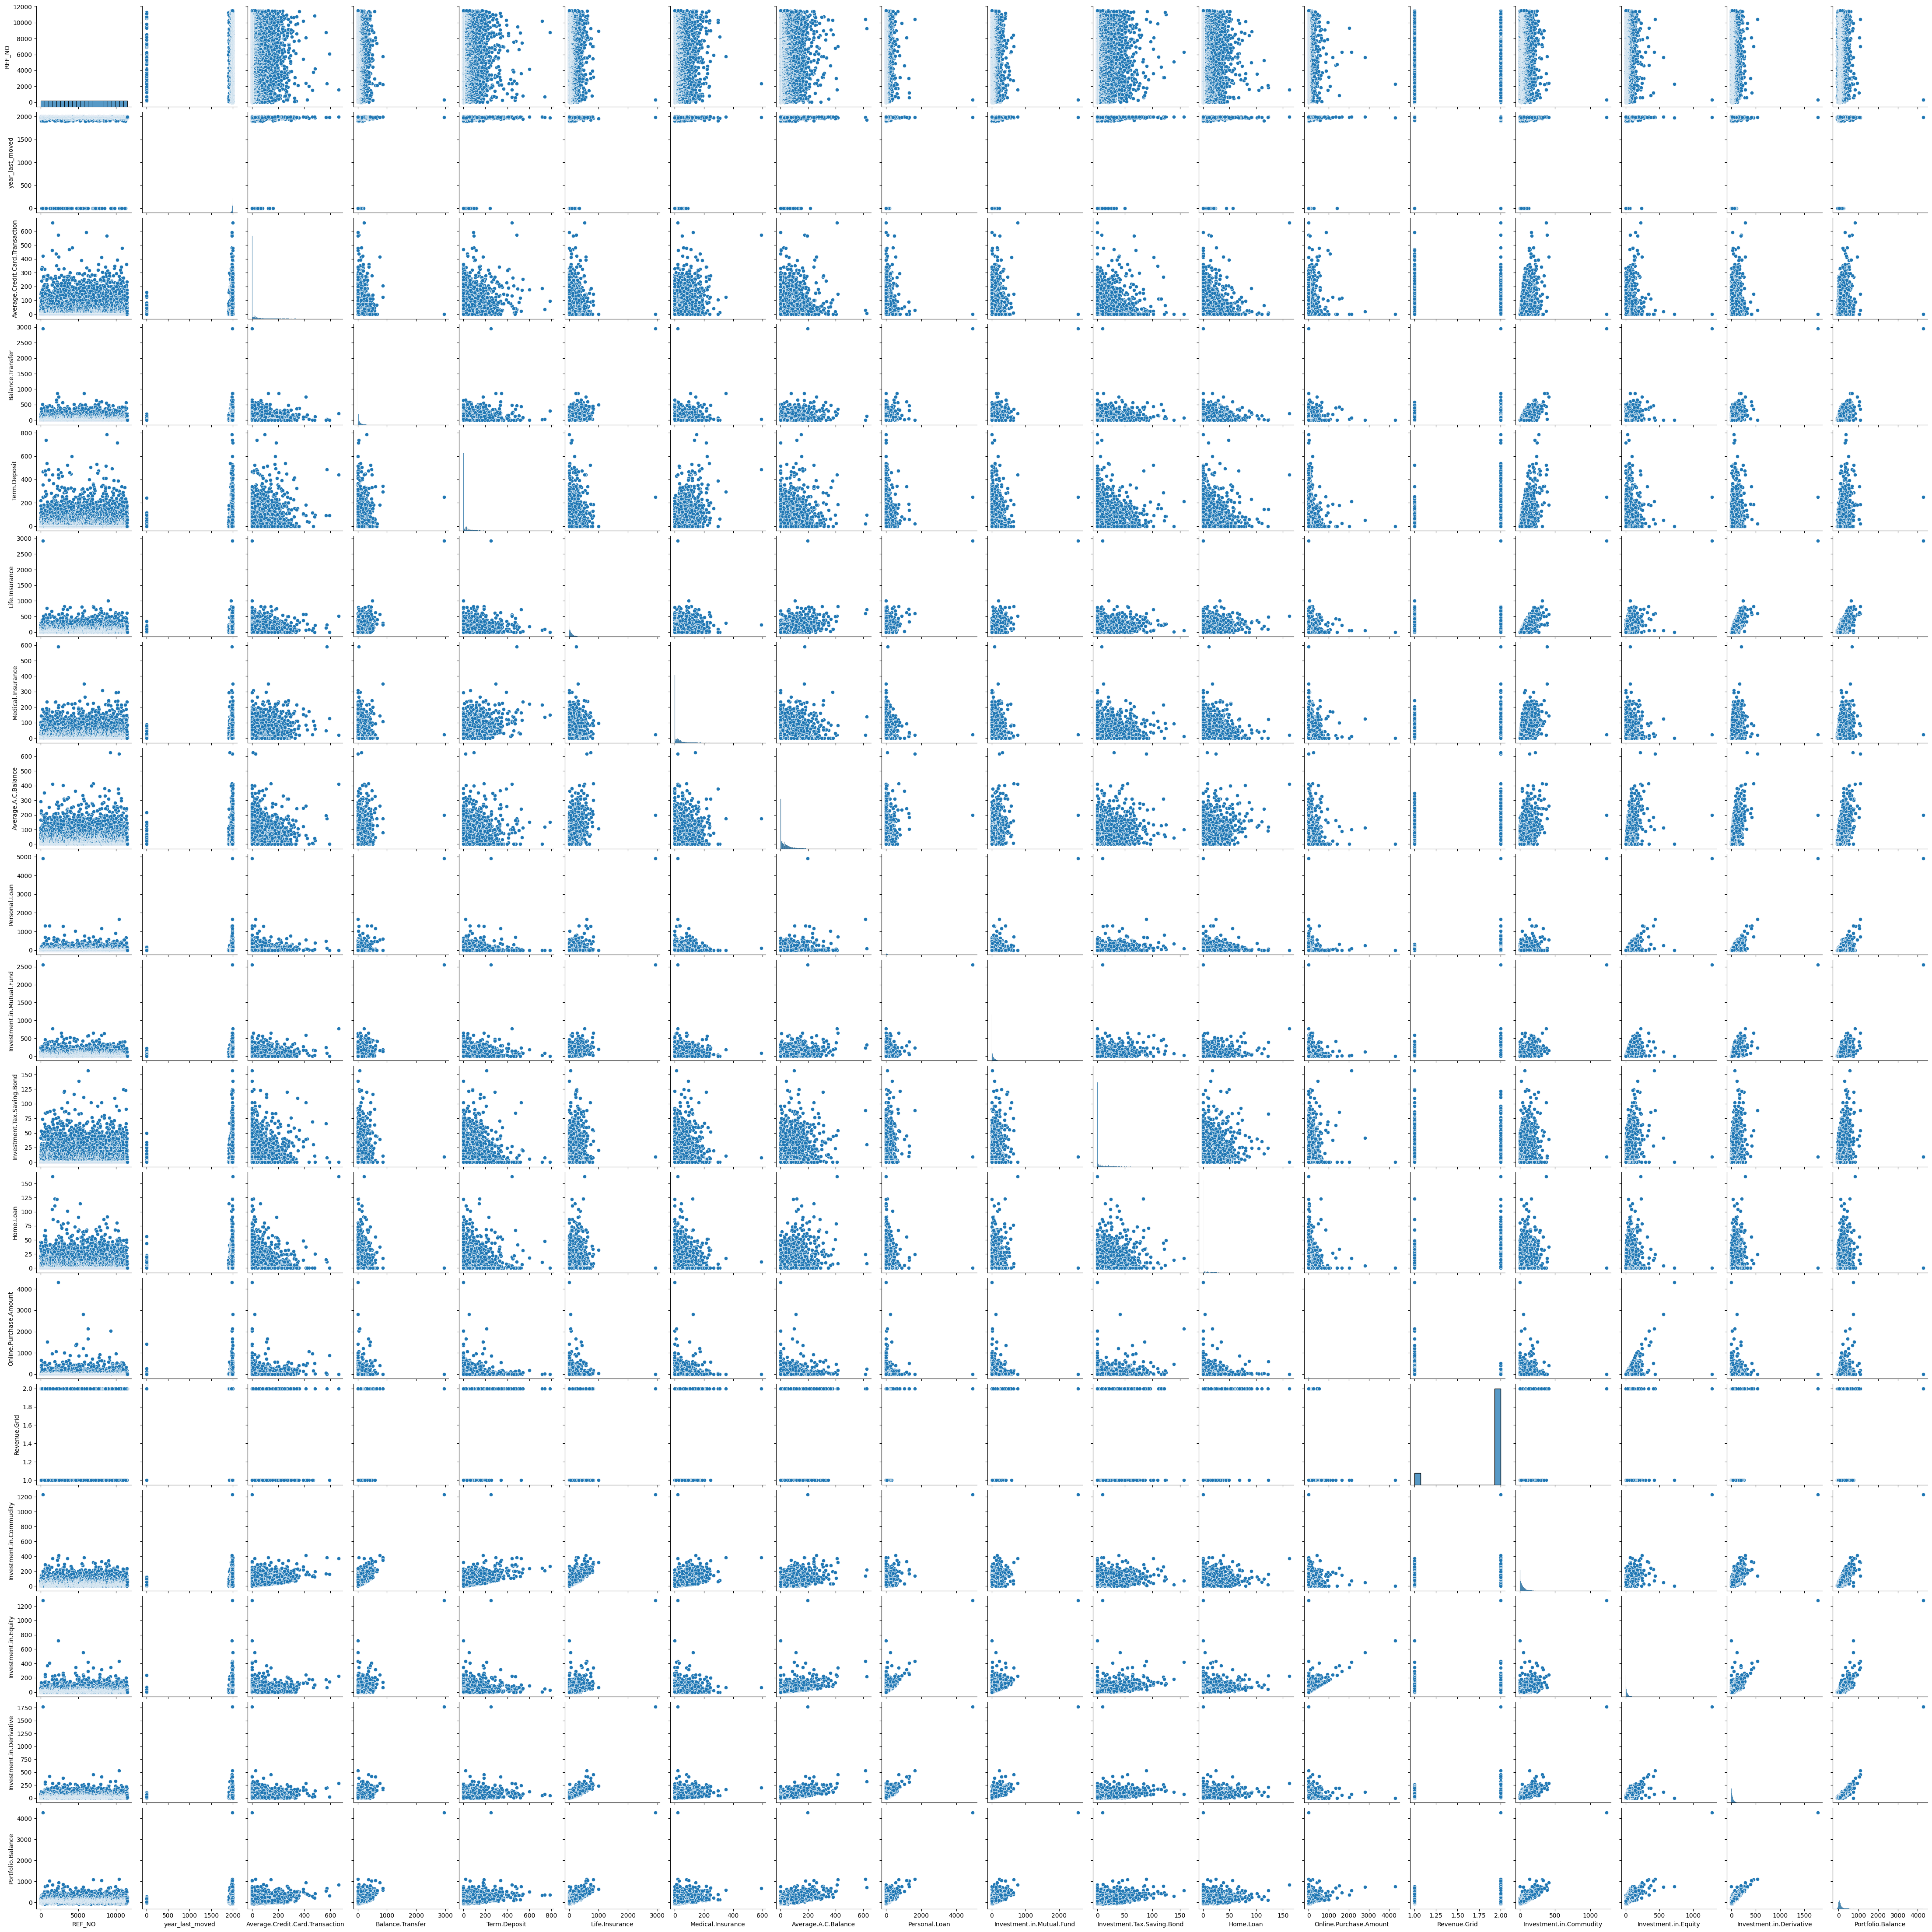

In [32]:
sns.pairplot(all_data[all_data.select_dtypes(["int64", "float64"]).columns])

<Axes: >

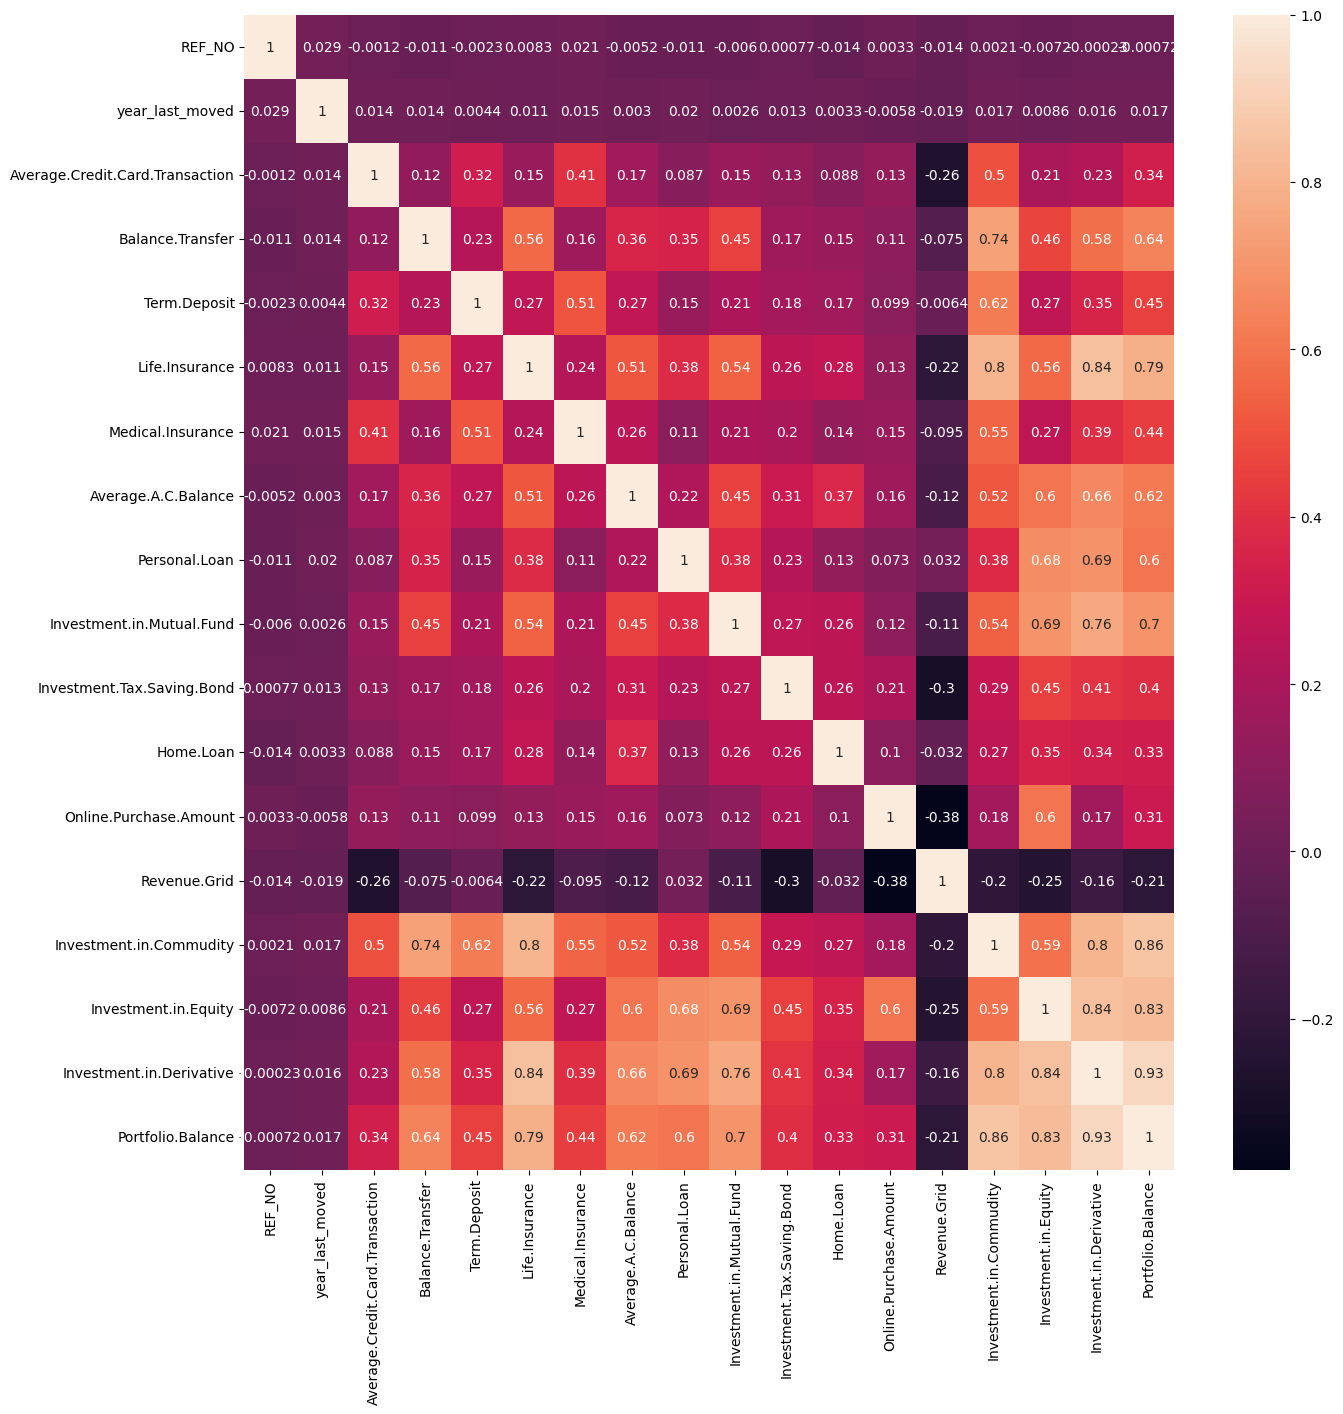

In [34]:
plt.figure(figsize=(15, 15))
# sns.heatmap(all_data.corr(), annot=all_data.corr(), cbar=False)
sns.heatmap(all_data[all_data.select_dtypes(["int64", "float64"]).columns].corr(),
           annot=all_data[all_data.select_dtypes(["int64", "float64"]).columns].corr())

In [36]:
all_data[all_data.select_dtypes(["int64", "float64"]).columns].groupby("Revenue.Grid").mean()

REF_NO  year_last_moved  Average.Credit.Card.Transaction  \
Revenue.Grid                                                                  
1.0           5917.920046      1978.528389                        62.962700   
2.0           5761.631180      1967.501859                        19.047208   

              Balance.Transfer  Term.Deposit  Life.Insurance  \
Revenue.Grid                                                   
1.0                  64.409027     29.285295      127.775006   
2.0                  44.963809     28.136886       59.396096   

              Medical.Insurance  Average.A.C.Balance  Personal.Loan  \
Revenue.Grid                                                          
1.0                   28.475875            48.370985      17.882445   
2.0                   18.347940            30.463982      26.926350   

              Investment.in.Mutual.Fund  Investment.Tax.Saving.Bond  \
Revenue.Grid                                                          
1.0                           64.287555                   17.286987   
2.0                           39.822647                    4.779924   

              Home.Loan  Online.Purchase.Amount  Investment.in.Commudity  \
Revenue.Grid                                                               
1.0            5.448447              114.913627                62.581657   
2.0            4.392522                7.264021                33.978583   

              Investment.in.Equity  Investment.in.Derivative  \
Revenue.Grid                                                   
1.0                      44.699177                 50.680672   
2.0                      18.942348                 29.956978   

              Portfolio.Balance  
Revenue.Grid                     
1.0                  159.005272  
2.0                   82.850835

In [37]:
all_data[all_data.select_dtypes(["int64", "float64"]).columns].groupby("Revenue.Grid").median()

REF_NO  year_last_moved  Average.Credit.Card.Transaction  \
Revenue.Grid                                                             
1.0           5946.0           1988.0                            14.98   
2.0           5747.0           1988.0                             0.00   

              Balance.Transfer  Term.Deposit  Life.Insurance  \
Revenue.Grid                                                   
1.0                      29.99          10.0           80.95   
2.0                      14.49           0.0           28.96   

              Medical.Insurance  Average.A.C.Balance  Personal.Loan  \
Revenue.Grid                                                          
1.0                       12.98                29.99            0.0   
2.0                        0.00                13.97            0.0   

              Investment.in.Mutual.Fund  Investment.Tax.Saving.Bond  \
Revenue.Grid                                                          
1.0                               48.94                        5.99   
2.0                               21.98                        0.00   

              Home.Loan  Online.Purchase.Amount  Investment.in.Commudity  \
Revenue.Grid                                                               
1.0                 0.0                   53.97                    52.87   
2.0                 0.0                    0.00                    21.59   

              Investment.in.Equity  Investment.in.Derivative  \
Revenue.Grid                                                   
1.0                          33.73                     41.23   
2.0                          11.41                     19.57   

              Portfolio.Balance  
Revenue.Grid                     
1.0                      132.96  
2.0                       59.70

In [38]:
all_data.drop(["REF_NO", "post_code", "post_area"], axis=1, inplace=True)
all_data.head()

children age_band   status     occupation occupation_partner  \
0        1    45-50  Partner   Professional       Professional   
1        1    61-65  Partner        Retired            Retired   
2        3    31-35  Partner   Professional       Professional   
3        0    55-60  Partner   Professional       Professional   
4        2    51-55  Partner  Manual Worker      Manual Worker   

      home_status      family_income self_employed self_employed_partner  \
0  Rent Privately           >=35,000           Yes                   Yes   
1        Own Home  <12,500, >=10,000            No                    No   
2        Own Home           >=35,000            No                    No   
3        Own Home           >=35,000            No                    No   
4        Own Home  <27,500, >=25,000           Yes                   Yes   

   year_last_moved  ... Home.Loan  Online.Purchase.Amount  Revenue.Grid  \
0             1999  ...      2.48                     0.0           2.0   
1             1959  ...      3.99                     0.0           2.0   
2             1992  ...      0.00                     0.0           2.0   
3             1990  ...      0.00                     0.0           2.0   
4             1994  ...      0.00                     0.0           2.0   

   gender       region  Investment.in.Commudity  Investment.in.Equity  \
0  Female   South West                    65.87                  9.27   
1  Female      Unknown                    42.46                  4.49   
2    Male  East Anglia                    75.38                  0.00   
3  Female   North West                    34.78                  6.91   
4  Female   South West                    48.58                  9.58   

   Investment.in.Derivative  Portfolio.Balance   data  
0                     30.93              87.48  train  
1                     26.23             110.73  train  
2                     26.66             127.57  train  
3                     29.24              33.79  train  
4                     20.65              56.17  train  

[5 rows x 30 columns]

In [ ]:
# 1 : potential and 2 for non potential 

In [39]:
all_data["Revenue.Grid"] = (all_data["Revenue.Grid"] == 1).astype(int)

In [40]:
all_data.head()

children age_band   status     occupation occupation_partner  \
0        1    45-50  Partner   Professional       Professional   
1        1    61-65  Partner        Retired            Retired   
2        3    31-35  Partner   Professional       Professional   
3        0    55-60  Partner   Professional       Professional   
4        2    51-55  Partner  Manual Worker      Manual Worker   

      home_status      family_income self_employed self_employed_partner  \
0  Rent Privately           >=35,000           Yes                   Yes   
1        Own Home  <12,500, >=10,000            No                    No   
2        Own Home           >=35,000            No                    No   
3        Own Home           >=35,000            No                    No   
4        Own Home  <27,500, >=25,000           Yes                   Yes   

   year_last_moved  ... Home.Loan  Online.Purchase.Amount  Revenue.Grid  \
0             1999  ...      2.48                     0.0             0   
1             1959  ...      3.99                     0.0             0   
2             1992  ...      0.00                     0.0             0   
3             1990  ...      0.00                     0.0             0   
4             1994  ...      0.00                     0.0             0   

   gender       region  Investment.in.Commudity  Investment.in.Equity  \
0  Female   South West                    65.87                  9.27   
1  Female      Unknown                    42.46                  4.49   
2    Male  East Anglia                    75.38                  0.00   
3  Female   North West                    34.78                  6.91   
4  Female   South West                    48.58                  9.58   

   Investment.in.Derivative  Portfolio.Balance   data  
0                     30.93              87.48  train  
1                     26.23             110.73  train  
2                     26.66             127.57  train  
3                     29.24              33.79  train  
4                     20.65              56.17  train  

[5 rows x 30 columns]

In [41]:
all_data.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea',
       'Average.Credit.Card.Transaction', 'Balance.Transfer', 'Term.Deposit',
       'Life.Insurance', 'Medical.Insurance', 'Average.A.C.Balance',
       'Personal.Loan', 'Investment.in.Mutual.Fund',
       'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount',
       'Revenue.Grid', 'gender', 'region', 'Investment.in.Commudity',
       'Investment.in.Equity', 'Investment.in.Derivative', 'Portfolio.Balance',
       'data'],
      dtype='object')

In [42]:
cat_col = all_data.select_dtypes("object").columns
cat_col

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'gender', 'region', 'data'],
      dtype='object')

In [43]:
for col in cat_col[:-1]:
    print(col)
    dummy = pd.get_dummies(all_data[col], drop_first=True, prefix=col)
    all_data = pd.concat([all_data, dummy], axis=1)
    del all_data[col]
del dummy
all_data

children
age_band
status
occupation
occupation_partner
home_status
family_income
self_employed
self_employed_partner
TVarea
gender
region


year_last_moved  Average.Credit.Card.Transaction  Balance.Transfer  \
0                 1999                             0.00              0.00   
1                 1959                             0.00             77.89   
2                 1992                           119.98              0.00   
3                 1990                             0.00             39.99   
4                 1994                             0.00            161.47   
...                ...                              ...               ...   
10150             1994                             0.00              0.00   
10151             1975                             0.00             34.99   
10152             1978                             9.99             24.49   
10153             1982                            21.98              1.03   
10154             1992                           124.93              0.00   

       Term.Deposit  Life.Insurance  Medical.Insurance  Average.A.C.Balance  \
0            196.95          132.42               0.00                 0.00   
1              0.00          134.39               0.00                 7.99   
2             96.94            0.00             159.97                 0.00   
3              0.00          133.93               0.00                39.48   
4             14.99           58.97               7.49                57.46   
...             ...             ...                ...                  ...   
10150          0.00            0.00               0.00                 0.00   
10151          0.00           86.97               0.00                 0.00   
10152         29.48           13.99              24.99                29.99   
10153        171.90          197.32              42.44                48.33   
10154         54.48            0.00              84.42                 0.00   

       Personal.Loan  Investment.in.Mutual.Fund  Investment.Tax.Saving.Bond  \
0              21.47                      24.18                        7.49   
1              14.98                       0.00                        0.00   
2               0.00                       0.00                        0.00   
3               0.00                       0.00                        2.00   
4               0.00                       0.00                        0.00   
...              ...                        ...                         ...   
10150          14.98                       0.00                        0.00   
10151          11.99                       0.00                        0.00   
10152           0.00                      11.99                        0.00   
10153          24.98                       9.99                        9.30   
10154           0.00                       0.00                        0.00   

       ...  region_Isle of Man  region_North  region_North West  \
0      ...               False         False              False   
1      ...               False         False              False   
2      ...               False         False              False   
3      ...               False         False               True   
4      ...               False         False              False   
...    ...                 ...           ...                ...   
10150  ...               False         False               True   
10151  ...               False         False               True   
10152  ...               False         False               True   
10153  ...               False         False               True   
10154  ...               False         False              False   

       region_Northern Ireland  region_Scotland  region_South East  \
0                        False            False              False   
1                        False            False              False   
2                        False            False              False   
3                        False            False              False   
4                        Fals

In [44]:
all_data.columns

Index(['year_last_moved', 'Average.Credit.Card.Transaction',
       'Balance.Transfer', 'Term.Deposit', 'Life.Insurance',
       'Medical.Insurance', 'Average.A.C.Balance', 'Personal.Loan',
       'Investment.in.Mutual.Fund', 'Investment.Tax.Saving.Bond', 'Home.Loan',
       'Online.Purchase.Amount', 'Revenue.Grid', 'Investment.in.Commudity',
       'Investment.in.Equity', 'Investment.in.Derivative', 'Portfolio.Balance',
       'data', 'children_1', 'children_2', 'children_3', 'children_4',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'age_band_Unknown',
       'status_Partner', 'status_Single/Never Married', 'status_Unknown',
       'status_Widowed', 'occupation_Housewife', 'occupation_Manual Worker',
       'occupation_Other', 'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', '

In [45]:
train_set = all_data.loc[all_data["data"] == "train"]
train_set.shape

(8124, 99)

In [46]:
train_set.drop("data", axis=1, inplace=True)
train_set.shape

(8124, 98)

In [47]:
test_set = all_data.loc[all_data["data"] == "test"]
test_set.shape

(2031, 99)

In [48]:
test_set.drop(["data", "Revenue.Grid"], axis=1, inplace=True)
test_set.shape

(2031, 97)

In [49]:
X = train_set.drop("Revenue.Grid", axis=1)
Y = train_set["Revenue.Grid"]
X.shape, Y.shape

((8124, 97), (8124,))

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [51]:
params = {
    "class_weight": ["balanced", None],
    "penalty": ["l1", "l2"], 
    "C": np.linspace(0.01, 1, 40)
}
params

{'class_weight': ['balanced', None],
 'penalty': ['l1', 'l2'],
 'C': array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
        0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
        0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
        0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
        0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
        0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
        0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
        0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])}

In [52]:
model = LogisticRegression(fit_intercept=True)
model

LogisticRegression()

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
160 * 10

1600

In [55]:
# grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring="roc_auc")

In [56]:
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=params, 
    cv=10, 
    n_iter=20,
    scoring="roc_auc")

In [57]:
random_search

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ]),
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [ ]:
# grid_search.fit(X=X, y=Y)

In [58]:
random_search.fit(X=X, y=Y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ]),
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [ ]:
# grid_search.cv_results_.keys()

In [59]:
random_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_penalty', 'param_class_weight', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [60]:
def report(results, n_tops=3):
    for i in range(1, n_tops + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model With Rank {0}".format(i))
            print("Mean Validation Score {0:.5f} (std: {1:.3f})".format(results["mean_test_score"][candidate], 
                                                                       results["std_test_score"][candidate]))
            print("Parameters: {0}".format(results["params"][candidate]))

In [ ]:
# report(grid_search.cv_results_, n_tops=5)

In [61]:
report(random_search.cv_results_, n_tops=5)

Model With Rank 1
Mean Validation Score 0.95472 (std: 0.013)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.4923076923076923}
Model With Rank 2
Mean Validation Score 0.95462 (std: 0.013)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.13692307692307693}
Model With Rank 3
Mean Validation Score 0.95450 (std: 0.013)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.6446153846153846}
Model With Rank 4
Mean Validation Score 0.95446 (std: 0.013)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.46692307692307694}
Model With Rank 5
Mean Validation Score 0.95445 (std: 0.013)
Parameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9746153846153846}


In [ ]:
# grid_search.best_estimator_

In [62]:
random_search.best_estimator_

LogisticRegression(C=0.4923076923076923, class_weight='balanced')

In [64]:
# logr = grid_search.best_estimator_
# logr

In [65]:
logr = random_search.best_estimator_
logr

LogisticRegression(C=0.4923076923076923, class_weight='balanced')

In [66]:
logr.fit(X, Y)

LogisticRegression(C=0.4923076923076923, class_weight='balanced')

In [67]:
cutoffs = np.linspace(0, 1, 99)
cutoffs

array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
       0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
       0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
       0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
       0.20408163, 0.21428571, 0.2244898 , 0.23469388, 0.24489796,
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.40816327, 0.41836735, 0.42857143, 0.43877551, 0.44897959,
       0.45918367, 0.46938776, 0.47959184, 0.48979592, 0.5       ,
       0.51020408, 0.52040816, 0.53061224, 0.54081633, 0.55102041,
       0.56122449, 0.57142857, 0.58163265, 0.59183673, 0.60204082,
       0.6122449 , 0.62244898, 0.63265306, 0.64285714, 0.65306122,
       0.66326531, 0.67346939, 0.68367347, 0.69387755, 0.70408163,
       0.71428571, 0.7244898 , 0.73469388, 0.74489796, 0.75510

In [68]:
[[0, 1]]

[[0, 1]]

In [69]:
train_score = logr.predict_proba(X)[:, 1]
train_score

array([0.00810874, 0.14327832, 0.03918363, ..., 0.59618183, 0.0477458 ,
       0.01841247])

In [70]:
real = Y


In [72]:
KS_all = []

for cutoff_num, cutoff in enumerate(cutoffs):
#     if cutoff_num != 0:
#         continue
    
    predicted = (train_score > cutoff).astype(int)
    print(predicted)
    TP = ((predicted == 1) & (real == 1)).sum()
    print(TP)
    TN = ((predicted == 0) & (real == 0)).sum()
    print(TN)
    FP = ((predicted == 1) & (real == 0)).sum()
    print(FP)
    FN = ((predicted == 0) & (real == 1)).sum()
    print(FN)
    
    P = TP + FN
    N = TN + FP
    print(P)
    print(N)
    
    KS = (TP / P) - (FP / N)
    print(KS)
    KS_all.append(KS)

[1 1 1 ... 1 1 1]
863
0
7261
0
863
7261
0.0
[0 1 1 ... 1 1 1]
860
847
6414
3
863
7261
0.1131743534363413
[0 1 1 ... 1 1 0]
857
1326
5935
6
863
7261
0.17566698259228053
[0 1 1 ... 1 1 0]
856
1725
5536
7
863
7261
0.22945934270343493
[0 1 0 ... 1 1 0]
853
2108
5153
10
863
7261
0.2787306524818779
[0 1 0 ... 1 0 0]
852
2503
4758
11
863
7261
0.3319721242856365
[0 1 0 ... 1 0 0]
850
2977
4284
13
863
7261
0.3949348916088955
[0 1 0 ... 1 0 0]
849
3611
3650
14
863
7261
0.4810919397795457
[0 1 0 ... 1 0 0]
846
4010
3251
17
863
7261
0.5325668027875715
[0 1 0 ... 1 0 0]
845
4284
2977
18
863
7261
0.5691439032926109
[0 1 0 ... 1 0 0]
844
4520
2741
19
863
7261
0.6004875648773915
[0 1 0 ... 1 0 0]
843
4707
2554
20
863
7261
0.625082844696575
[0 1 0 ... 1 0 0]
842
4875
2386
21
863
7261
0.6470614050556291
[0 1 0 ... 1 0 0]
841
5013
2248
22
863
7261
0.6649083031092156
[0 1 0 ... 1 0 0]
840
5140
2121
23
863
7261
0.6812402583174639
[0 0 0 ... 1 0 0]
838
5249
2012
25
863
7261
0.6939344675908674
[0 0 0 ... 1 0

In [74]:
KS_all

[0.0,
 0.1131743534363413,
 0.17566698259228053,
 0.22945934270343493,
 0.2787306524818779,
 0.3319721242856365,
 0.3949348916088955,
 0.4810919397795457,
 0.5325668027875715,
 0.5691439032926109,
 0.6004875648773915,
 0.625082844696575,
 0.6470614050556291,
 0.6649083031092156,
 0.6812402583174639,
 0.6939344675908674,
 0.7063532327105732,
 0.7149157796785091,
 0.725187963505405,
 0.735654841345923,
 0.7462594412632897,
 0.7518490744773224,
 0.7566361534335646,
 0.7603784277117884,
 0.7671268094773854,
 0.769710335204045,
 0.776458716969642,
 0.7797070748772431,
 0.7833116270786179,
 0.786640735126295,
 0.7892812327897274,
 0.7921971746068577,
 0.7953885605776858,
 0.798442224471665,
 0.8006695559045508,
 0.8048012182100184,
 0.8029206655407395,
 0.8062259953851135,
 0.8080971325242254,
 0.8096358535728665,
 0.8097973538530185,
 0.8105904925806421,
 0.8113028811681896,
 0.8127608520767547,
 0.8143565450621688,
 0.8157575440339611,
 0.8151734619930954,
 0.8162182666711137,
 0.816242044

In [73]:
max(KS_all)

0.8162420448744168

In [75]:
KS_all == max(KS_all)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [76]:
cutoffs[KS_all == max(KS_all)]

array([0.48979592])

In [77]:
final_cutoff = cutoffs[KS_all == max(KS_all)][0]
final_cutoff

0.4897959183673469

In [78]:
logr.intercept_

array([-0.00087532])

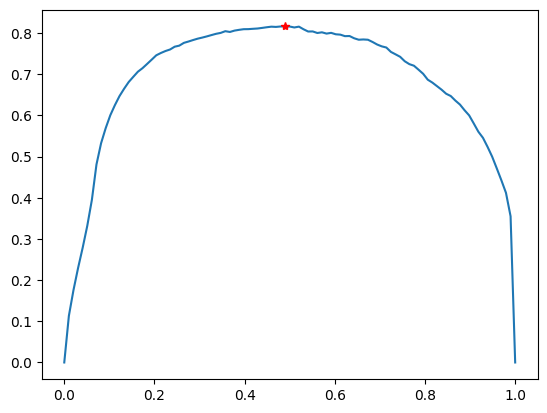

In [79]:
plt.plot(cutoffs, KS_all)
plt.plot(cutoffs[KS_all == max(KS_all)][0], max(KS_all), "*r")

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [81]:
train_score = logr.predict_proba(X)[:, 1]
train_classes = (train_score > final_cutoff).astype(int)
real = Y

In [82]:
confusion_matrix(train_classes, real)

array([[6583,   78],
       [ 678,  785]], dtype=int64)

In [83]:
Y.value_counts()

Revenue.Grid
0    7261
1     863
Name: count, dtype: int64

In [84]:
print(classification_report(train_classes, real))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6661
           1       0.91      0.54      0.67      1463

    accuracy                           0.91      8124
   macro avg       0.91      0.76      0.81      8124
weighted avg       0.91      0.91      0.90      8124



In [85]:
roc_auc_score(train_classes, real)

0.762429370501495

In [86]:
logr.predict_proba(test_set)

array([[0.99785922, 0.00214078],
       [0.95946256, 0.04053744],
       [0.99536996, 0.00463004],
       ...,
       [0.97611615, 0.02388385],
       [0.79471281, 0.20528719],
       [0.82652578, 0.17347422]])